Telco Customer Churn Feature Engineering
----
### Problem :
Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.elco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.

21 Değişken 7043 Gözlem

- CustomerId : Müşteri İd’si
- Gender : Cinsiyet
- SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
- Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
- Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
- tenure : Müşterinin şirkette kaldığı ay sayısı
- PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
- MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
- InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
- OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
- StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
- StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
- Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
- PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
- PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
- MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
- TotalCharges : Müşteriden tahsil edilen toplam tutar
- Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler


Her satır benzersiz bir müşteriyi temsil etmekte.

Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.

Müşterilerin kaydolduğu hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler


Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Görev 1 : Keşifçi Veri Analizi
----

Adım 1: Numerik ve kategorik değişkenleri yakalayınız.

In [2]:
df_ = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/machine_learning/data/Telco-Customer-Churn.csv")

In [3]:
df = df_.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
import EDA as eda

cat_cols, num_cols, cat_but_car = eda.grab_col_names(dataframe = df, cat_th = 10, car_th = 30)

Observations: 7043
Variables: 21
Cat_cols: 17
num_cols: 2
cat_but_car: 2
num_bat_cat: 1


Adım 2: Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)

In [6]:
df[cat_cols].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [7]:
df[cat_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
SeniorCitizen       2
dtype: int64

In [8]:
cat_cols = [col for col in cat_cols if col not in "Churn"]

In [9]:
df[num_cols].head()

,tenure,MonthlyCharges
0,1,29.850
1,34,56.950
2,2,53.850
3,45,42.300
4,2,70.700


In [10]:
df[cat_but_car].head()

,customerID,TotalCharges
0,7590-VHVEG,29.85
1,5575-GNVDE,1889.5
2,3668-QPYBK,108.15
3,7795-CFOCW,1840.75
4,9237-HQITU,151.65


In [11]:
df.drop("customerID", axis=1, inplace = True)

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [13]:
df["TotalCharges"].head()

0     29.850
1   1889.500
2    108.150
3   1840.750
4    151.650
Name: TotalCharges, dtype: float64

In [14]:
num_cols = num_cols + ["TotalCharges"]

In [15]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
df[cat_cols].dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
SeniorCitizen        int64
dtype: object

In [17]:
df["SeniorCitizen"].nunique()

2

Adım 3: Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz.

        gender  Ratio
Male      3555 50.476
Female    3488 49.524
######################################


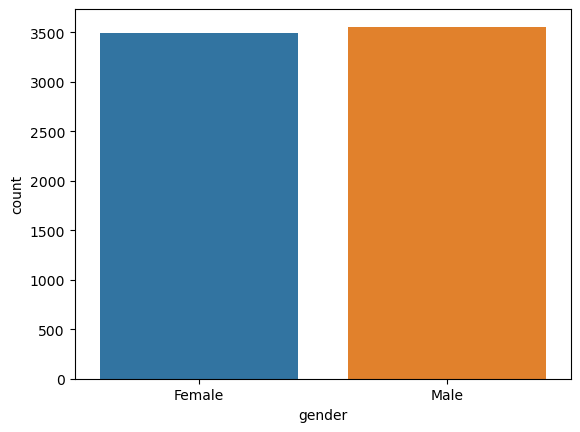

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
######################################


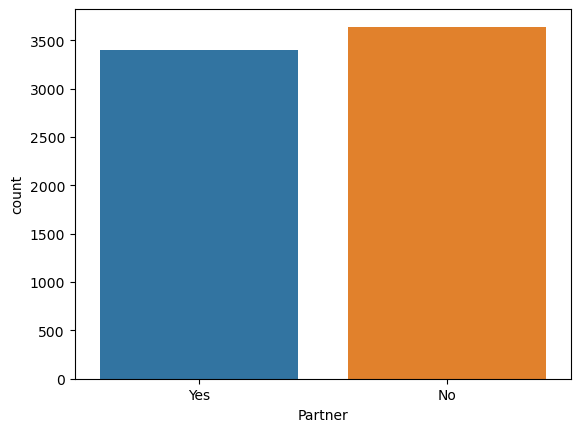

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
######################################


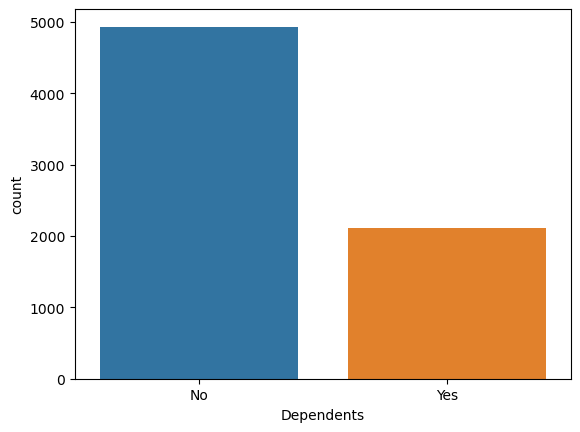

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
######################################


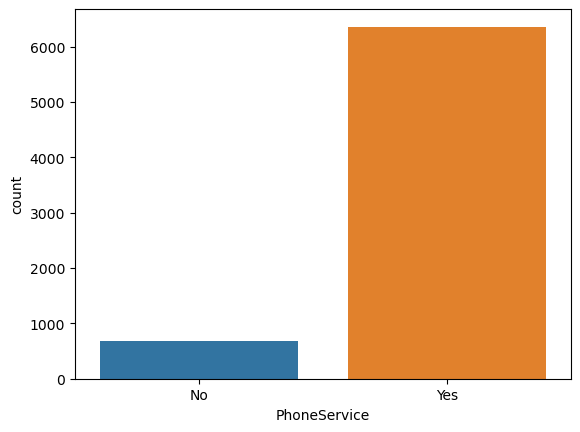

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
######################################


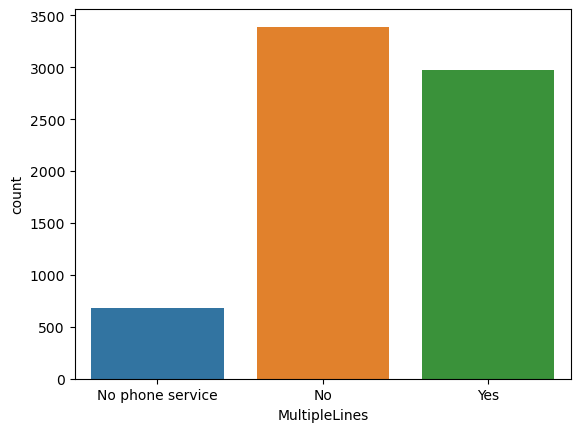

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
######################################


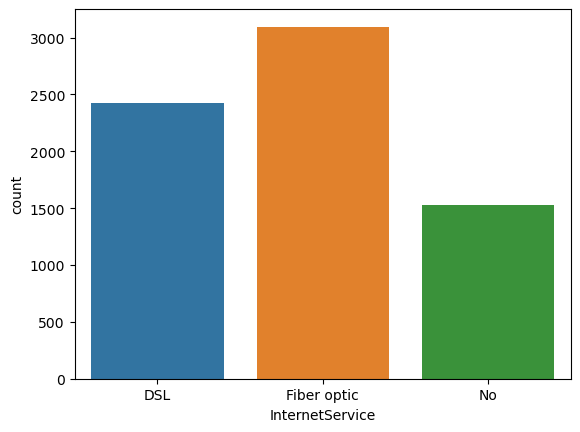

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
######################################


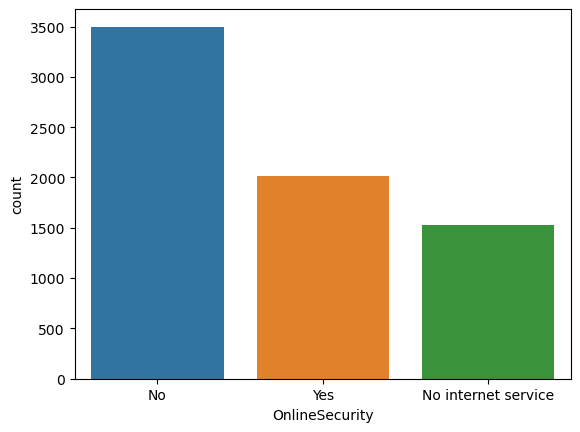

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
######################################


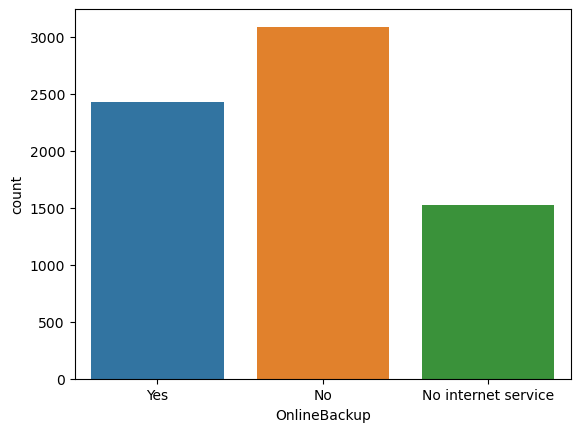

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
######################################


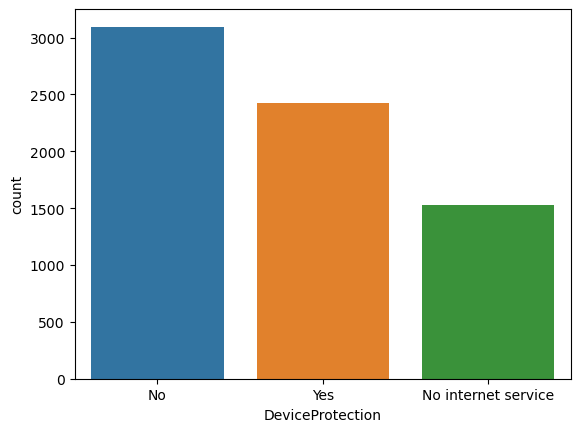

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
######################################


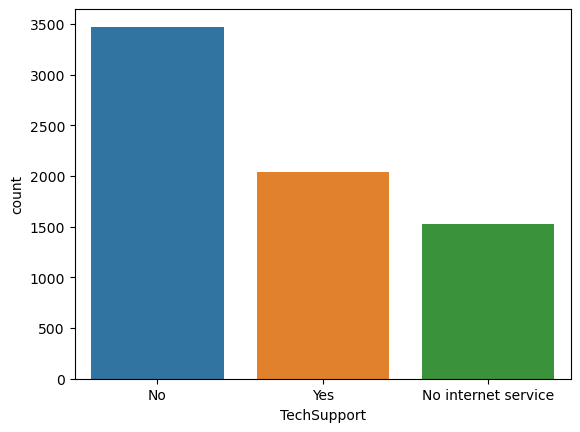

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
######################################


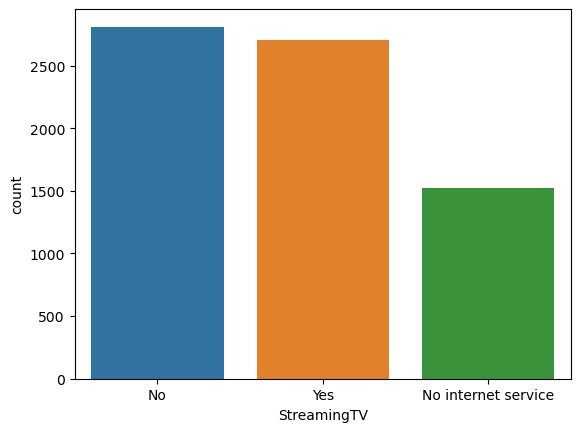

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
######################################


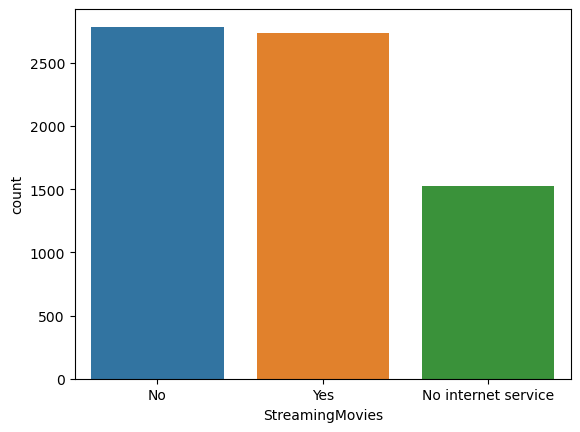

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
######################################


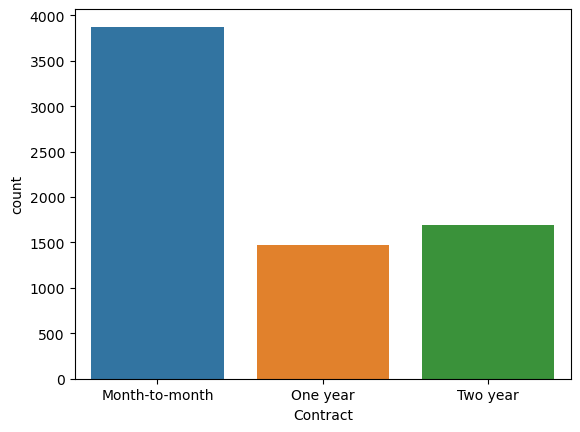

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
######################################


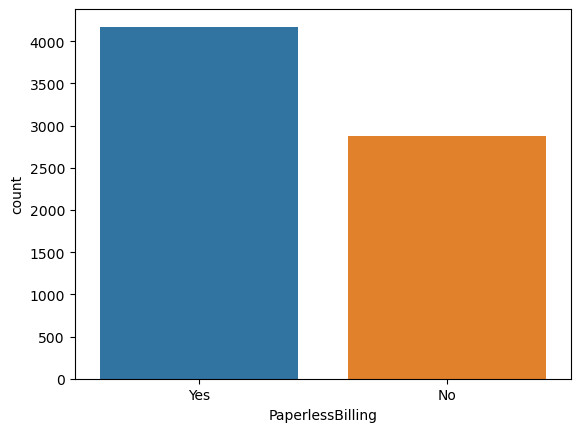

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
######################################


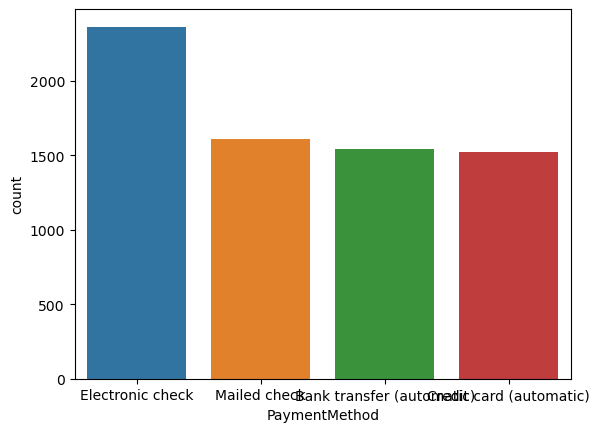

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
######################################


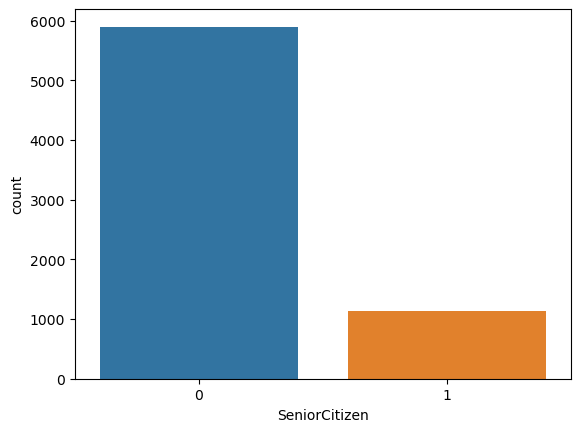

In [18]:
for col in cat_cols:
    eda.cat_summary(dataframe = df, col_name = col, plot = True)

count   7043.000
mean      32.371
std       24.559
min        0.000
1%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
max       72.000
Name: tenure, dtype: float64
######################################


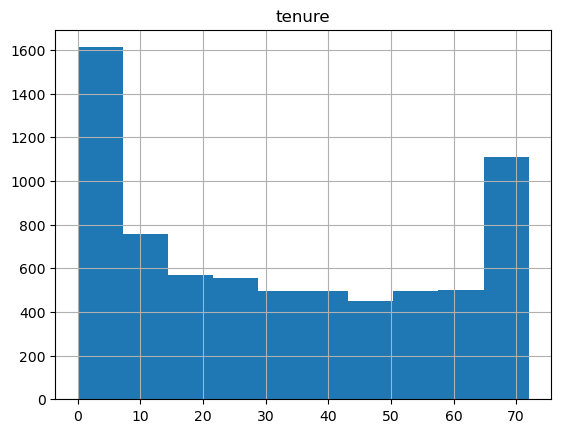

count   7043.000
mean      64.762
std       30.090
min       18.250
1%        19.200
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
max      118.750
Name: MonthlyCharges, dtype: float64
######################################


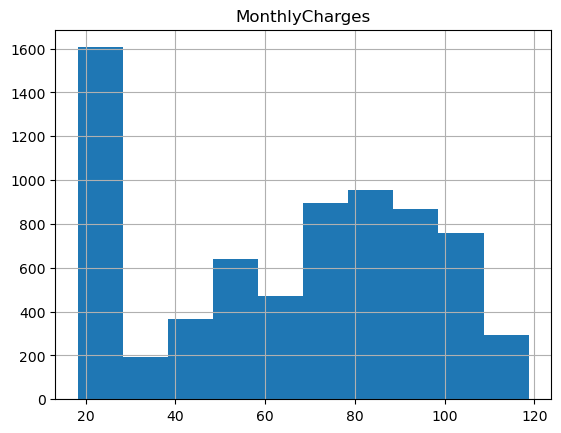

count   7032.000
mean    2283.300
std     2266.771
min       18.800
1%        19.900
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
max     8684.800
Name: TotalCharges, dtype: float64
######################################


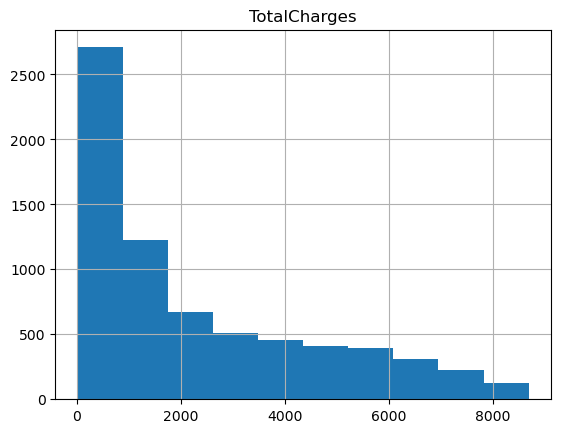

In [19]:
for col in num_cols:
    eda.num_summary(dataframe = df, col_name = col, plot = True)

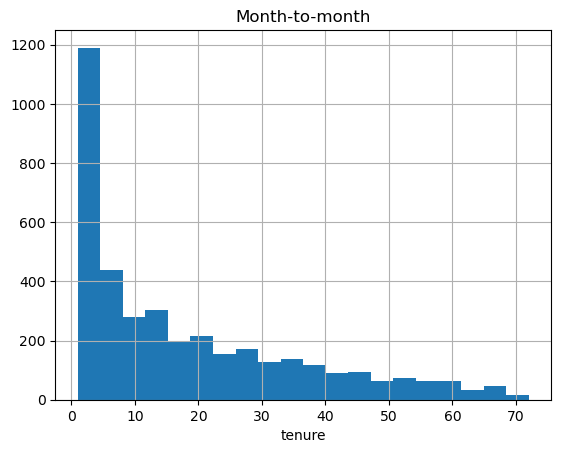

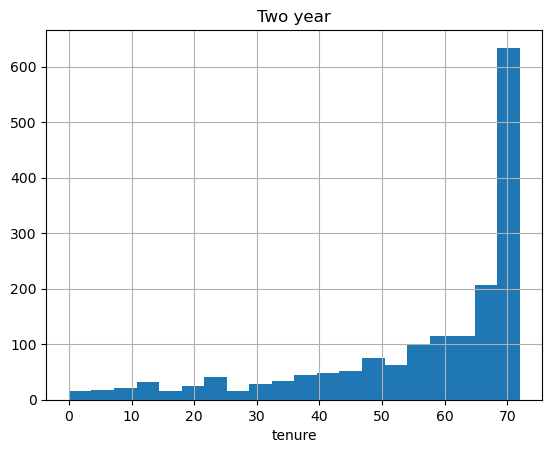

In [20]:
# Tenure'e bakıldığında 1 aylık müşterilerin çok fazla olduğunu ardından da 70 aylık müşterilerin geldiğini görüyoruz.
# Farklı kontratlardan dolayı gerçekleşmiş olabilir, aylık sözleşmesi olan kişilerin tenure ile 2 yıllık sözleşmesi olan kişilerin tenure'ne bakalım.
df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.show()

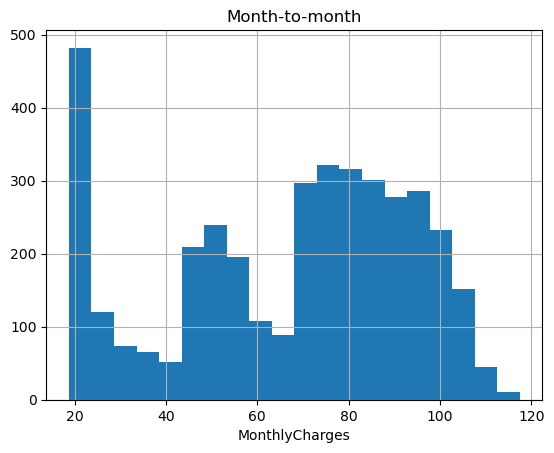

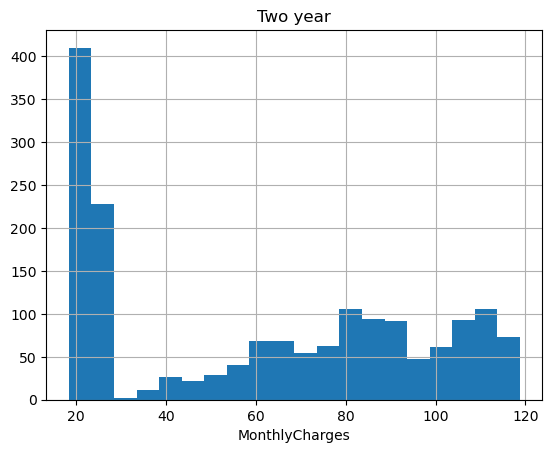

In [21]:
# MonthyChargers'a bakıldığında aylık sözleşmesi olan müşterilerin aylık ortalama ödemeleri daha fazla olabilir.
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Month-to-month")
plt.show()

df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Two year")
plt.show()

Adım 4: Kategorik değişkenler ile hedef değişken incelemesini yapınız.

In [22]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [23]:
for col in cat_cols:
    eda.target_summary_with_cat_cols(dataframe = df, target_col = "Churn", cat_col = col)

        TARGET_MEAN
gender             
Female        0.269
Male          0.262
################################
         TARGET_MEAN
Partner             
No             0.330
Yes            0.197
################################
            TARGET_MEAN
Dependents             
No                0.313
Yes               0.155
################################
              TARGET_MEAN
PhoneService             
No                  0.249
Yes                 0.267
################################
                  TARGET_MEAN
MultipleLines                
No                      0.250
No phone service        0.249
Yes                     0.286
################################
                 TARGET_MEAN
InternetService             
DSL                    0.190
Fiber optic            0.419
No                     0.074
################################
                     TARGET_MEAN
OnlineSecurity                  
No                         0.418
No internet service        0.074
Yes        

In [24]:
# NUMERİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ

for col in num_cols:
    eda.target_summary_with_num_cols(df, "Churn", col)

       TENURE_MEAN
Churn             
0           37.570
1           17.979
################################
       MONTHLYCHARGES_MEAN
Churn                     
0                   61.265
1                   74.441
################################
       TOTALCHARGES_MEAN
Churn                   
0               2555.344
1               1531.796
################################


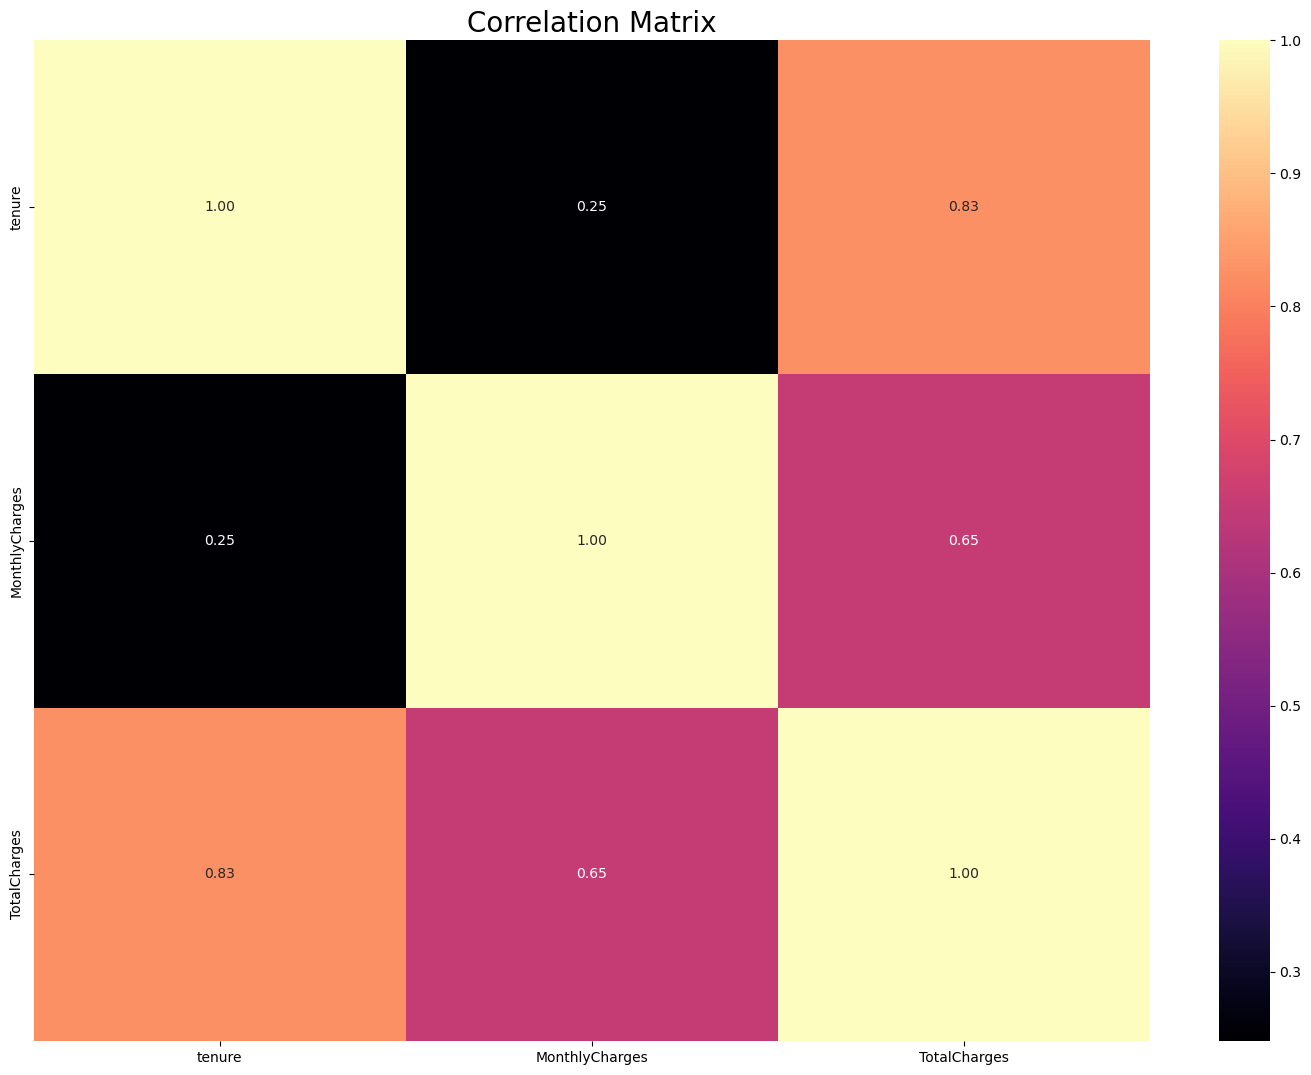

In [25]:
# korelasyon

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show();

Adım 5: Aykırı gözlem var mı inceleyiniz.

In [26]:
import outliers as out

for col in num_cols:
    print(col, out.check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [27]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
df["MonthlyCharges"].min()

18.25

In [29]:
df["TotalCharges"].fillna(df["MonthlyCharges"] * 12, inplace = True)

In [30]:
df.isnull().sum().sum()

0

Görev 2 : Feature Engineering
----

Adım 1: Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.

Adım 2: Yeni değişkenler oluşturunuz.

In [31]:
# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 0.1)

# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 0.1)

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,27.136,0.909,27.136
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,55.411,0.973,18.371
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,51.500,0.956,17.371
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.815,0.965,13.645
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,72.214,1.021,64.273


In [33]:
df.shape

(7043, 30)

Adım 3: Encoding işlemlerini gerçekleştiriniz.

In [34]:
cat_cols, num_cols, cat_but_car = eda.grab_col_names(df)

Observations: 7043
Variables: 30
Cat_cols: 24
num_cols: 6
cat_but_car: 0
num_bat_cat: 8


In [35]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'Churn',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_TotalServices',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [36]:
df.dtypes

gender                     object
SeniorCitizen               int64
Partner                    object
Dependents                 object
tenure                      int64
PhoneService               object
MultipleLines              object
InternetService            object
OnlineSecurity             object
OnlineBackup               object
DeviceProtection           object
TechSupport                object
StreamingTV                object
StreamingMovies            object
Contract                   object
PaperlessBilling           object
PaymentMethod              object
MonthlyCharges            float64
TotalCharges              float64
Churn                       int64
NEW_TENURE_YEAR            object
NEW_Engaged                 int64
NEW_noProt                  int64
NEW_Young_Not_Engaged       int64
NEW_TotalServices           int64
NEW_FLAG_ANY_STREAMING      int64
NEW_FLAG_AutoPayment        int64
NEW_AVG_Charges           float64
NEW_Increase              float64
NEW_AVG_Servic

In [37]:
# LABEL ENCODING
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
labelencoder = LabelEncoder()
for col in binary_cols:
    df[col] = labelencoder.fit_transform(df[col])

    
# ONE HOT ENCODING
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [38]:
df.head()

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,0,1,0,1,0,1,29.850,29.850,0,1,27.136,0.909,27.136,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,1,0,0,34,1,0,56.950,1889.500,0,3,55.411,0.973,18.371,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,1,0,0,2,1,1,53.850,108.150,1,3,51.500,0.956,17.371,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,1,0,0,45,0,0,42.300,1840.750,0,3,40.815,0.965,13.645,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,0,0,0,2,1,1,70.700,151.650,1,1,72.214,1.021,64.273,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [39]:
df.shape

(7043, 45)

Adım 4: Numerik değişkenler için standartlaştırma yapınız.

In [40]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [41]:
X_scaled = RobustScaler().fit_transform(X)

Görev 3 : Modelleme
----
Adım 1: Sınıflandırma algoritmaları ile modeller kurup, accuracy skorlarını inceleyip. En iyi 4 modeli seçiniz.

Adım 2: Seçtiğiniz modeller ile hiperparametre optimizasyonu gerçekleştirin ve bulduğunuz hiparparametreler ile modeli
tekrar kurunuz.

In [42]:
models = [('LR', LogisticRegression(random_state=0)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=0)),
          ('RF', RandomForestClassifier(random_state=0)),
          ('SVM', SVC(gamma='auto', random_state=0)),
          ('XGB', XGBClassifier(random_state=0)),
          ("LightGBM", LGBMClassifier(random_state=0)),
          ("GBM", GradientBoostingClassifier(random_state=0)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=0))]

for name, model in models:
    cv_results = cross_validate(model, X_scaled, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8048
Auc: 0.8479
Recall: 0.527
Precision: 0.6677
F1: 0.5886
########## KNN ##########
Accuracy: 0.7667
Auc: 0.7814
Recall: 0.5383
Precision: 0.5635
F1: 0.5504
########## CART ##########
Accuracy: 0.7335
Auc: 0.6618
Recall: 0.5051
Precision: 0.498
F1: 0.5014
########## RF ##########
Accuracy: 0.7927
Auc: 0.8281
Recall: 0.4998
Precision: 0.6417
F1: 0.5616
########## SVM ##########
Accuracy: 0.7962
Auc: 0.8177
Recall: 0.4505
Precision: 0.6734
F1: 0.5395
########## XGB ##########
Accuracy: 0.7899
Auc: 0.826
Recall: 0.5062
Precision: 0.6304
F1: 0.5611
########## LightGBM ##########
Accuracy: 0.7954
Auc: 0.8357
Recall: 0.5356
Precision: 0.6373
F1: 0.5817
########## GBM ##########
Accuracy: 0.8021
Auc: 0.8448
Recall: 0.519
Precision: 0.6637
F1: 0.582
########## CatBoost ##########
Accuracy: 0.798
Auc: 0.8428
Recall: 0.5158
Precision: 0.6516
F1: 0.5756


In [43]:
lr_params = {"penalty": ["l1", "l2", "elasticnet", None],
             "C": [0.1, 1, 10, 100, 1000]}

catboost_params = {"iterations": [250, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [250, 500],
               "colsample_bytree": [0.5, 1]}

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 6],
              "n_estimators": [250, 500],
              "subsample": [1, 0.5]}

In [44]:
best_params = {}

models = [('LR', LogisticRegression(random_state=0), lr_params),
          ("LightGBM", LGBMClassifier(random_state=0), lgbm_params),
          ("GBM", GradientBoostingClassifier(random_state=0), gbm_params),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=0), catboost_params)]

for name, model, params in models:
    gscv = GridSearchCV(model, params, cv = 10, n_jobs = -1).fit(X_scaled, y)
    best_params[name] = gscv.best_params_
    model_w_params = model.set_params(**gscv.best_params_)
    cv_results = cross_validate(model_w_params, 
                                X_scaled, 
                                y, 
                                cv=10, 
                                scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.806
Auc: 0.8484
Recall: 0.5345
Precision: 0.6688
F1: 0.5936
########## LightGBM ##########
Accuracy: 0.8038
Auc: 0.8441
Recall: 0.5131
Precision: 0.6711
F1: 0.5813
########## GBM ##########
Accuracy: 0.8031
Auc: 0.8464
Recall: 0.5121
Precision: 0.6693
F1: 0.5796
########## CatBoost ##########
Accuracy: 0.8053
Auc: 0.8484
Recall: 0.5196
Precision: 0.6737
F1: 0.5862


In [48]:
final_model = LogisticRegression(**best_params["LR"], random_state=0).fit(X_scaled, y)